# Task 2 Iris dataset, predict the optimum number of clusters
# Submitted by


# Yogesh Kakde

# How does the K-Means Algorithm Work?
The working of the K-Means algorithm is explained in the below steps:
Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.

Let's understand the above steps by considering the visual plots:
Suppose we have two variables M1 and M2. The x-y axis scatter plot of these two variables is given below:


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Random Intialization Trap in K-Means
Random initialization trap is a problem that occurs in the K-means algorithm. In random initialization trap when the centroids of the clusters to be generated are explicitly defined by the User then inconsistency may be created and this may sometimes lead to generating wrong clusters in the dataset. So random initialization trap may sometimes prevent us from developing the correct clusters.


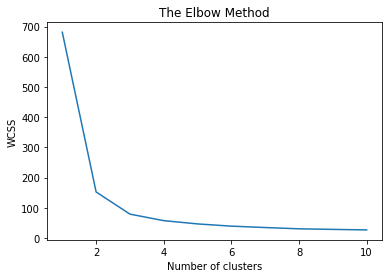

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ returns SSE
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as: 
# 3

# Fitting K-Means to the dataset

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #K-Means++ is used to avoid random cenroid trap
y_kmeans = kmeans.fit_predict(iris_df)

# Visualising the clusters

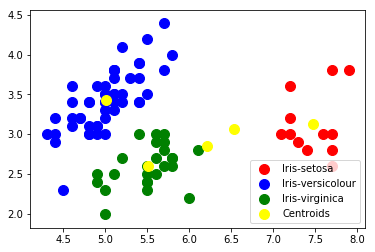

In [9]:
# Visualising the clusters - On the first two columns
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()